## Yağış Tahmini (Classification) [PYTHON]:

### CRISP-DM 1: İş Probleminin Tanımı :
#### Problemin Tanımı
+ Bu çalışmada weatherAUS.csv veri setine dayanarak bir sonraki gün yağış olup olmayacağının (RainTomorrow) sınıflandırma modeli ile tahmin edilmesi amaçlanmıştır. Hedef değişken RainTomorrow olup iki sınıftan oluşur: Yes/No. Proje, günlük meteorolojik ölçümlere (sıcaklık, nem, rüzgâr, basınç vb.) dayalı karar destek üretmeyi hedefler.
#### İş Amacı
+ Tarım: Sulama ve saha operasyonlarını yağış olasılığına göre planlamak.
+ Enerji: Güneş/rüzgâr üretim tahminlerinde yardımcı sinyal sağlamak.
+ Ulaşım/Operasyon: Yağış riskli günlerde kaynak planını optimize etmek.
#### Başarı Kriterleri (KPI)
+ Dengesiz sınıf yapısı nedeniyle sadece Accuracy yeterli değildir. Bu nedenle öncelikli metrikler:
+ F1 (Yes) ≥ 0.60
+ Recall (Yes) ≥ 0.60 (yağmurlu günü kaçırmamak kritik)
+ Accuracy ≥ 0.82
Ek raporlar: Confusion Matrix, sınıf dağılımı, değişken önemleri.


### CRISP-DM 2: Veri Anlama (Data Understanding):


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("weatherAUS.csv")

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


In [7]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


In [9]:
cat_cols = df.select_dtypes(include="object").columns.tolist()
print("\nKategorik sütunlar:", cat_cols)
nuniques = df[cat_cols].nunique().sort_values(ascending=False)
print("\nKategorik sütunların benzersiz değer sayıları:")
display(nuniques)


Kategorik sütunlar: ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']

Kategorik sütunların benzersiz değer sayıları:


Date            3436
Location          49
WindGustDir       16
WindDir9am        16
WindDir3pm        16
RainToday          2
RainTomorrow       2
dtype: int64

In [10]:
na_cnt = df.isna().sum()
na_pct = (na_cnt / len(df) * 100).round(2)
missing_summary = pd.DataFrame({"missing_count": na_cnt, "missing_pct": na_pct}).sort_values("missing_pct", ascending=False)
print("\nEksik değer özeti (en çoktan aza):")
display(missing_summary.head(20))


Eksik değer özeti (en çoktan aza):


,missing_count,missing_pct
Sunshine,69835,48.01
Evaporation,62790,43.17
Cloud3pm,59358,40.81
Cloud9am,55888,38.42
Pressure9am,15065,10.36
Pressure3pm,15028,10.33
WindDir9am,10566,7.26
WindGustDir,10326,7.10
WindGustSpeed,10263,7.06
Humidity3pm,4507,3.10


In [11]:
# 6) Hedef değişken (RainTomorrow) – sınıf dağılımı
target = "RainTomorrow"
class_counts = df[target].value_counts(dropna=False)
class_pct = (class_counts / class_counts.sum() * 100).round(2)
print("\nRainTomorrow sınıf dağılımı (adet):")
display(class_counts)
print("\nRainTomorrow sınıf dağılımı (yüzde):")
display(class_pct)


RainTomorrow sınıf dağılımı (adet):


RainTomorrow
No     110316
Yes     31877
NaN      3267
Name: count, dtype: int64


RainTomorrow sınıf dağılımı (yüzde):


RainTomorrow
No     75.84
Yes    21.91
NaN     2.25
Name: count, dtype: float64

In [12]:
# 7) Tarih bilgisini parse et ve temel parçalar (Aşama 3’te genişleteceğiz)
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["DayOfMonth"] = df["Date"].dt.day

In [13]:
# 8) Temel tutarlılık ve aralık kontrolleri (örnekler)
checks = {
    "Rainfall_nonneg": (df["Rainfall"] >= 0).all(skipna=True),
    "WindSpeed_nonneg": (df["WindSpeed3pm"] >= 0).all(skipna=True) if "WindSpeed3pm" in df else True,
    "Humidity_range_ok": ((df["Humidity3pm"].between(0,100)) | (df["Humidity3pm"].isna())).all() if "Humidity3pm" in df else True,
    "Pressure_range_ok": ((df["Pressure3pm"].between(900,1100)) | (df["Pressure3pm"].isna())).all() if "Pressure3pm" in df else True,
}
print("\nBasit kalite kontrolleri:")
for k,v in checks.items():
    print(f"- {k}: {v}")


Basit kalite kontrolleri:
- Rainfall_nonneg: False
- WindSpeed_nonneg: False
- Humidity_range_ok: True
- Pressure_range_ok: True


In [14]:
# Basit korelasyon görünümü – sayısal sütunlarda
num_df = df.select_dtypes(include=[np.number])
corr = num_df.corr(numeric_only=True).round(2)
print("\nSayısal sütunlar arası korelasyon (ilk 10 satır):")
display(corr.head(10))


Sayısal sütunlar arası korelasyon (ilk 10 satır):


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,DayOfMonth
MinTemp,1.00,0.74,0.10,0.47,0.07,0.18,0.18,0.18,-0.23,0.01,-0.45,-0.46,0.08,0.02,0.90,0.71,0.04,-0.20,0.00
MaxTemp,0.74,1.00,-0.07,0.59,0.47,0.07,0.01,0.05,-0.50,-0.51,-0.33,-0.43,-0.29,-0.28,0.89,0.98,0.06,-0.16,0.00
Rainfall,0.10,-0.07,1.00,-0.06,-0.23,0.13,0.09,0.06,0.22,0.26,-0.17,-0.13,0.20,0.17,0.01,-0.08,-0.01,-0.03,0.00
Evaporation,0.47,0.59,-0.06,1.00,0.37,0.20,0.19,0.13,-0.50,-0.39,-0.27,-0.29,-0.18,-0.18,0.55,0.57,0.08,-0.03,-0.01
Sunshine,0.07,0.47,-0.23,0.37,1.00,-0.03,0.01,0.05,-0.49,-0.63,0.04,-0.02,-0.68,-0.70,0.29,0.49,0.01,0.02,-0.00
WindGustSpeed,0.18,0.07,0.13,0.20,-0.03,1.00,0.61,0.69,-0.22,-0.03,-0.46,-0.41,0.07,0.11,0.15,0.03,-0.03,0.06,-0.01
WindSpeed9am,0.18,0.01,0.09,0.19,0.01,0.61,1.00,0.52,-0.27,-0.03,-0.23,-0.18,0.03,0.05,0.13,0.00,-0.02,0.05,-0.01
WindSpeed3pm,0.18,0.05,0.06,0.13,0.05,0.69,0.52,1.00,-0.15,0.02,-0.30,-0.26,0.05,0.03,0.16,0.03,-0.03,0.06,-0.01
Humidity9am,-0.23,-0.50,0.22,-0.50,-0.49,-0.22,-0.27,-0.15,1.00,0.67,0.14,0.19,0.45,0.36,-0.47,-0.50,0.01,-0.09,0.02
Humidity3pm,0.01,-0.51,0.26,-0.39,-0.63,-0.03,-0.03,0.02,0.67,1.00,-0.03,0.05,0.52,0.52,-0.22,-0.56,-0.01,-0.02,0.01


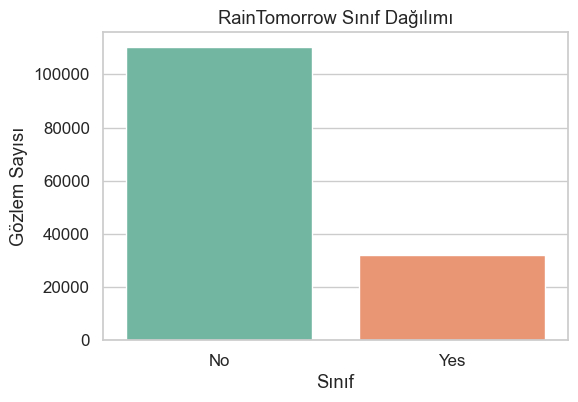

In [15]:
# Stil ayarları
sns.set(style="whitegrid", palette="viridis", font_scale=1.1)

# === 1️⃣ Hedef Değişken Dağılımı (RainTomorrow) ===
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="RainTomorrow", palette="Set2")
plt.title("RainTomorrow Sınıf Dağılımı")
plt.xlabel("Sınıf")
plt.ylabel("Gözlem Sayısı")
plt.show()

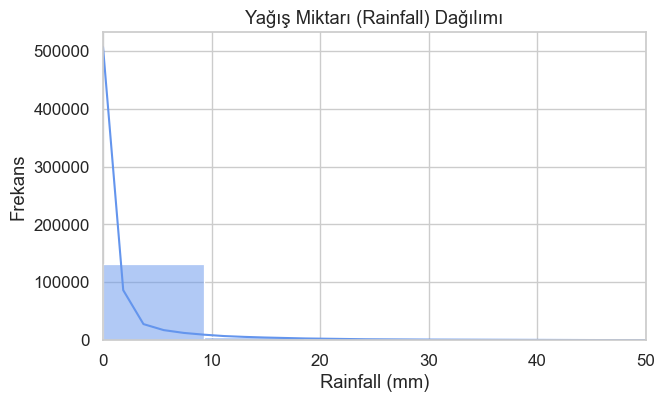

In [16]:


# === 2 Yağış (Rainfall) Histogramı ===
plt.figure(figsize=(7,4))
sns.histplot(df["Rainfall"], bins=40, kde=True, color="cornflowerblue")
plt.title("Yağış Miktarı (Rainfall) Dağılımı")
plt.xlabel("Rainfall (mm)")
plt.ylabel("Frekans")
plt.xlim(0,50)  # uç değerleri kesmek için
plt.show()

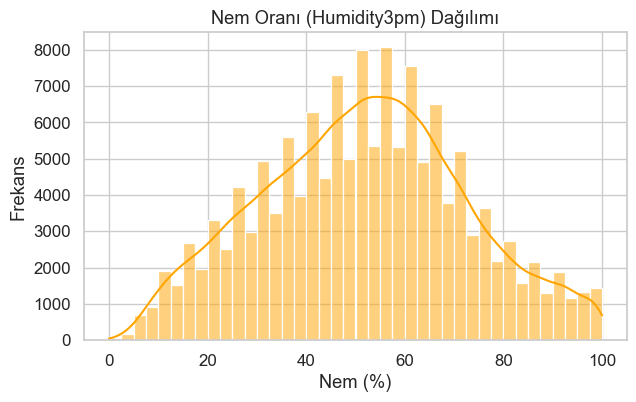

In [17]:
# === 3Ortalama Nem (Humidity3pm) Dağılımı ===
plt.figure(figsize=(7,4))
sns.histplot(df["Humidity3pm"], bins=40, kde=True, color="orange")
plt.title("Nem Oranı (Humidity3pm) Dağılımı")
plt.xlabel("Nem (%)")
plt.ylabel("Frekans")
plt.show()

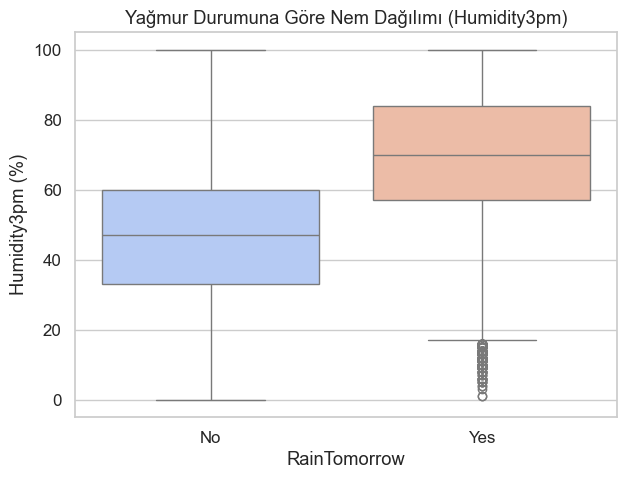

In [18]:

# === Yağmurlu Günlerde Nem Farkı (RainTomorrow bazında) ===
plt.figure(figsize=(7,5))
sns.boxplot(data=df, x="RainTomorrow", y="Humidity3pm", palette="coolwarm")
plt.title("Yağmur Durumuna Göre Nem Dağılımı (Humidity3pm)")
plt.xlabel("RainTomorrow")
plt.ylabel("Humidity3pm (%)")
plt.show()


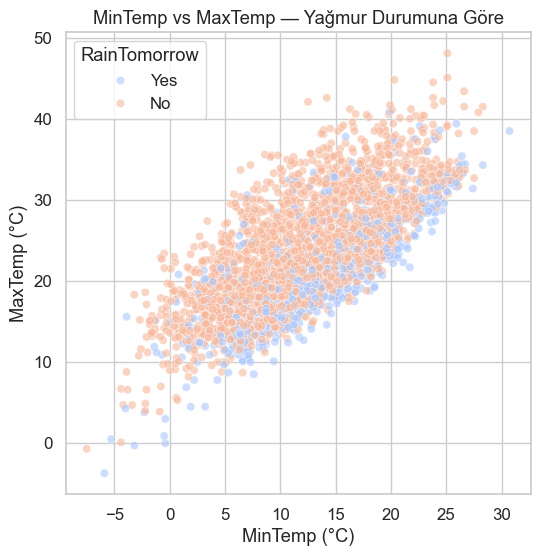

In [19]:

# === 5 Sıcaklıklar Arası İlişki (MinTemp vs MaxTemp) ===
plt.figure(figsize=(6,6))
sns.scatterplot(data=df.sample(3000, random_state=42), x="MinTemp", y="MaxTemp",
                hue="RainTomorrow", alpha=0.6, palette="coolwarm")
plt.title("MinTemp vs MaxTemp — Yağmur Durumuna Göre")
plt.xlabel("MinTemp (°C)")
plt.ylabel("MaxTemp (°C)")
plt.legend(title="RainTomorrow")
plt.show()

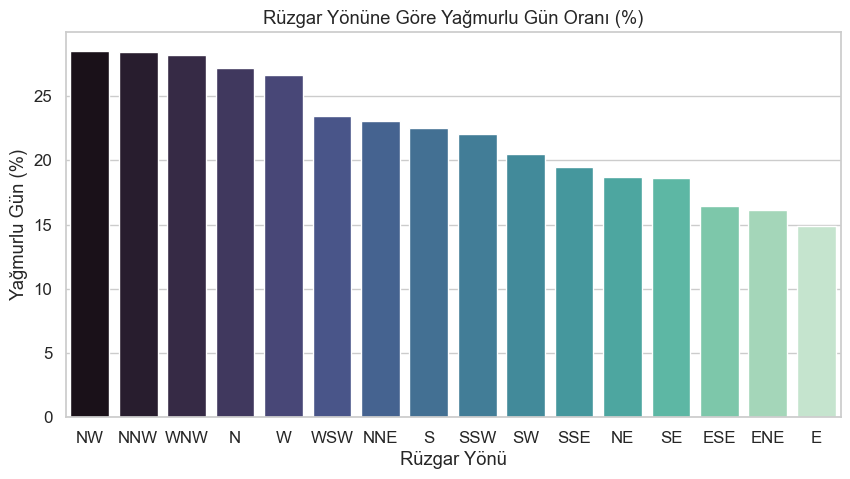

In [20]:
# === 6Kategorik Değişken (WindGustDir) — Yağmur Oranı ===
plt.figure(figsize=(10,5))
wind_rain = df.groupby("WindGustDir")["RainTomorrow"].value_counts(normalize=True).unstack().fillna(0)
wind_rain = (wind_rain["Yes"]*100).sort_values(ascending=False)
sns.barplot(x=wind_rain.index, y=wind_rain.values, palette="mako")
plt.title("Rüzgar Yönüne Göre Yağmurlu Gün Oranı (%)")
plt.xlabel("Rüzgar Yönü")
plt.ylabel("Yağmurlu Gün (%)")
plt.show()

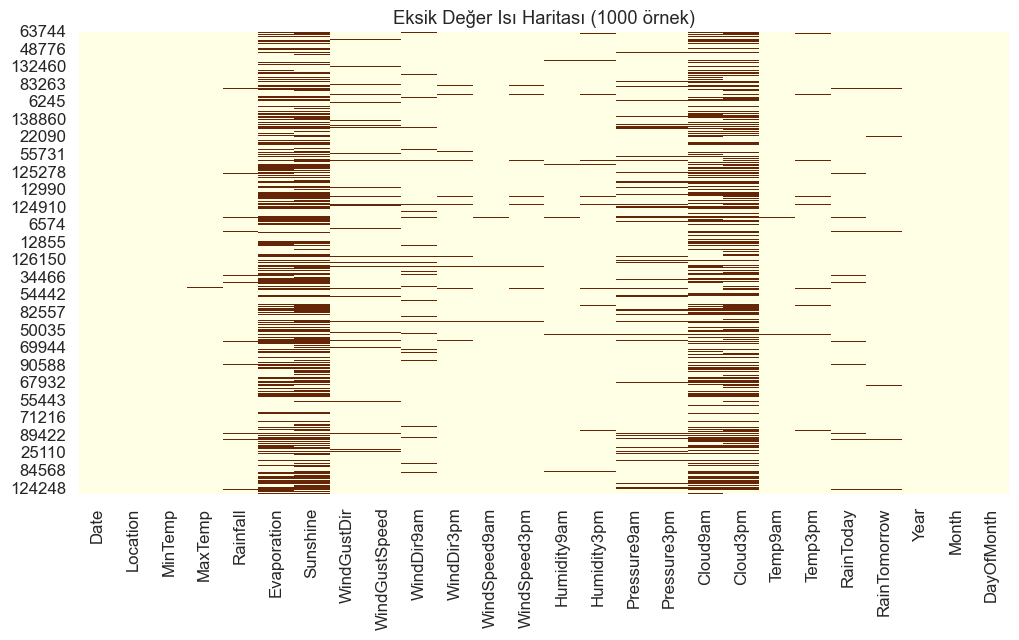

In [21]:
# === 7 Eksik Değer Isı Haritası (küçük örnekle) ===
plt.figure(figsize=(12,6))
sns.heatmap(df.sample(1000, random_state=123).isnull(), cbar=False, cmap="YlOrBr")
plt.title("Eksik Değer Isı Haritası (1000 örnek)")
plt.show()


### CRISP-DM 3: Veri Hazırlama (Data Preparation):

In [22]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [23]:
#  Hedef değişkeni belirle
target = "RainTomorrow"
y = df[target]
X = df.drop(columns=[target, 'Date'])

In [24]:
#  Eksik hedef değerleri çıkar
mask = y.notna()
X = X.loc[mask]
y = y.loc[mask]

In [25]:
# 6 Sayısal ve kategorik sütunları ayır
num_cols = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object']).columns.tolist()

In [26]:
# Çok fazla kategori içeren 'Location' değişkenini çıkar (KNIME ile aynı)
if 'Location' in cat_cols:
    cat_cols.remove('Location')


In [27]:
ohe_kwargs = dict(handle_unknown='ignore')
if tuple(int(x) for x in sklearn.__version__.split('.')[:2]) >= (1, 2):
    # sklearn >= 1.2
    ohe_kwargs['sparse_output'] = False
else:
    # sklearn < 1.2
    ohe_kwargs['sparse'] = False

In [28]:
#  Sayısal ve kategorik pipeline tanımları
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(**ohe_kwargs))
])

In [29]:
#  Tüm dönüşümleri birleştir (ColumnTransformer)
preprocess = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ],
    remainder='drop'
)

In [30]:
#  Eğitim ve test ayrımı (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=123, stratify=y
)

print(f" Eğitim veri boyutu: {X_train.shape}")
print(f" Test veri boyutu:   {X_test.shape}")
print("\nSınıf oranları (train):")
print(y_train.value_counts(normalize=True).round(3))

 Eğitim veri boyutu: (99535, 24)
 Test veri boyutu:   (42658, 24)

Sınıf oranları (train):
RainTomorrow
No     0.776
Yes    0.224
Name: proportion, dtype: float64


In [31]:
#  Pipeline’ı fit et ve dönüştürülmüş veri boyutlarını kontrol et
X_train_prep = preprocess.fit_transform(X_train)
X_test_prep = preprocess.transform(X_test)

print("\n Hazırlanmış eğitim veri boyutu:", X_train_prep.shape)
print(" Hazırlanmış test veri boyutu:", X_test_prep.shape)


 Hazırlanmış eğitim veri boyutu: (99535, 66)
 Hazırlanmış test veri boyutu: (42658, 66)


### CRISP-DM 4: Modelleme (Modeling):

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, classification_report

In [33]:
# 1 Random Forest modeli (standart sürüm)
rf_model = Pipeline(steps=[
    ('preprocess', preprocess),   # Aşama 3'te oluşturduğumuz dönüşümler
    ('rf', RandomForestClassifier(
        n_estimators=100,
        max_depth=None,
        random_state=123,
        n_jobs=-1
    ))
])

In [34]:
# 2 Eğitimi başlat
rf_model.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['MinTemp', 'MaxTemp',
                                                   'Rainfall', 'Evaporation',
                                                   'Sunshine', 'WindGustSpeed',
                                                   'WindSpeed9am',
                                                   'WindSpeed3pm',
                                                   'Humidity9am', 'Humidity3pm',
                                                   'Pressure9am', 'Pressure3pm',
                                                   'Cloud9am', 'Cloud3pm',
                                                   'Temp9am', 'Temp3pm']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['WindGustDir', 'WindDir9am',
                                                   'WindDir3pm',
                                                   'RainToday'])])),
                ('rf', RandomForestClassifier(n_jobs=-1, random_state=123))])

In [35]:
# 3 Test verisinde tahmin yap
y_pred = rf_model.predict(X_test)

In [36]:
# 4 Değerlendirme metrikleri
acc = accuracy_score(y_test, y_pred)
prec, rec, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary', pos_label='Yes')
cm = confusion_matrix(y_test, y_pred, labels=['No', 'Yes'])

print("=== Random Forest (Standart) ===")
print(f"Accuracy:  {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall:    {rec:.3f}")
print(f"F1 Score:  {f1:.3f}")
print("Confusion Matrix:\n", cm)


=== Random Forest (Standart) ===
Accuracy:  0.854
Precision: 0.761
Recall:    0.510
F1 Score:  0.611
Confusion Matrix:
 [[31563  1532]
 [ 4683  4880]]


In [37]:
# 5 Dengeli versiyon (class_weight='balanced')
rf_balanced = Pipeline(steps=[
    ('preprocess', preprocess),
    ('rf', RandomForestClassifier(
        n_estimators=100,
        class_weight='balanced',
        random_state=123,
        n_jobs=-1
    ))
])

rf_balanced.fit(X_train, y_train)
y_pred_bal = rf_balanced.predict(X_test)

acc_bal = accuracy_score(y_test, y_pred_bal)
prec_bal, rec_bal, f1_bal, _ = precision_recall_fscore_support(y_test, y_pred_bal, average='binary', pos_label='Yes')
cm_bal = confusion_matrix(y_test, y_pred_bal, labels=['No', 'Yes'])

print("\n=== Random Forest (Dengeli) ===")
print(f"Accuracy:  {acc_bal:.3f}")
print(f"Precision: {prec_bal:.3f}")
print(f"Recall:    {rec_bal:.3f}")
print(f"F1 Score:  {f1_bal:.3f}")
print("Confusion Matrix:\n", cm_bal)


=== Random Forest (Dengeli) ===
Accuracy:  0.853
Precision: 0.769
Recall:    0.491
F1 Score:  0.600
Confusion Matrix:
 [[31687  1408]
 [ 4865  4698]]


In [38]:
# 6 Ek olarak detaylı sınıflandırma raporu
print("\n--- Classification Report (Dengeli Model) ---")
print(classification_report(y_test, y_pred_bal, digits=3))


--- Classification Report (Dengeli Model) ---
              precision    recall  f1-score   support

          No      0.867     0.957     0.910     33095
         Yes      0.769     0.491     0.600      9563

    accuracy                          0.853     42658
   macro avg      0.818     0.724     0.755     42658
weighted avg      0.845     0.853     0.840     42658



### CRISP-DM 5: Değerlendirme (Evaluation)

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

In [40]:
# 1 En iyi modeli (örneğin dengeli RF) yeniden kullanıyoruz
best_model = rf_balanced
y_pred_best = y_pred_bal  # önceki aşamadan gelen tahminler

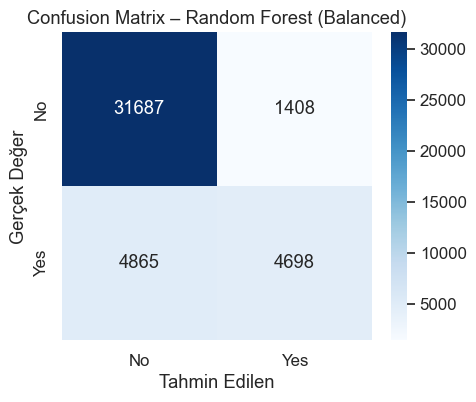

In [41]:
# 2 Confusion Matrix görselleştirme
plt.figure(figsize=(5,4))
sns.heatmap(cm_bal, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title("Confusion Matrix – Random Forest (Balanced)")
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek Değer")
plt.show()

In [42]:
# 3 Sınıflandırma raporu (Precision, Recall, F1)
report = classification_report(y_test, y_pred_best, target_names=['No', 'Yes'])
print("=== Classification Report ===")
print(report)

=== Classification Report ===
              precision    recall  f1-score   support

          No       0.87      0.96      0.91     33095
         Yes       0.77      0.49      0.60      9563

    accuracy                           0.85     42658
   macro avg       0.82      0.72      0.75     42658
weighted avg       0.85      0.85      0.84     42658



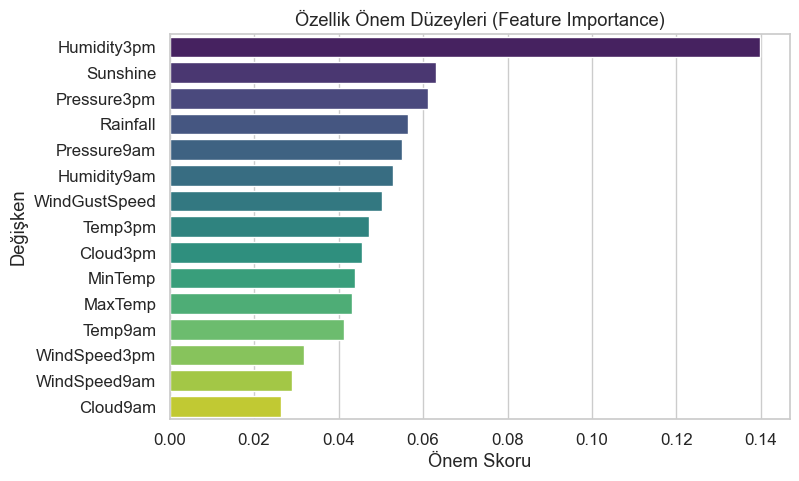

In [43]:
# 4 Değişken önem düzeyleri (Feature Importance)
rf_model_obj = best_model.named_steps['rf']
feature_names = (
    best_model.named_steps['preprocess']
    .named_transformers_['num']
    .get_feature_names_out(num_cols).tolist()
    + best_model.named_steps['preprocess']
    .named_transformers_['cat']
    .named_steps['onehot']
    .get_feature_names_out(cat_cols).tolist()
)

importances = pd.Series(rf_model_obj.feature_importances_, index=feature_names)
top_feats = importances.sort_values(ascending=False).head(15)

plt.figure(figsize=(8,5))
sns.barplot(x=top_feats.values, y=top_feats.index, palette='viridis')
plt.title("Özellik Önem Düzeyleri (Feature Importance)")
plt.xlabel("Önem Skoru")
plt.ylabel("Değişken")
plt.show()

In [44]:
# 1) Kütüphaneler
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier


from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# 2) Veri setini oku
df = pd.read_csv("weatherAUS.csv")   # dosya aynı klasörde olmalı

# 3) Hedefte eksik olanları at
df = df[df["RainTomorrow"].notna()].copy()

# 4) Tarihi parçala (KNIME’de yaptığımız gibi)
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.day
df = df.drop(columns=["Date"])

# 5) X / y ayır
y = df["RainTomorrow"]              # hedef değişken
X = df.drop(columns=["RainTomorrow"])

print("Sınıf dağılımı:")
print(y.value_counts())

# 6) Sayısal ve kategorik değişken listeleri
numeric_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = X.select_dtypes(include=["object"]).columns.tolist()

# 7) Dönüşümler: sayısal + kategorik
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", MinMaxScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

# 8) Aday modeller (AutoML'nin deneyeceği modeller)
models = {
    "LogisticRegression": LogisticRegression(
        max_iter=1000,
        class_weight="balanced",
        n_jobs=-1
    ),
    "RandomForest": RandomForestClassifier(
        n_estimators=200,
        random_state=42,
        class_weight="balanced"
    ),
    "GradientBoosting": GradientBoostingClassifier(
        random_state=42
    ),
    "KNN": KNeighborsClassifier(
        n_neighbors=15
    ),
   
}

# 9) Eğitim / test ayrımı
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

# 10) Modelleri sırayla eğit, CV + test skorlarını topla
results = []

for name, model in models.items():
    print(f"\n>>> Model eğitiliyor: {name}")

    clf = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("model", model)
    ])

    # 3 katlı cross validation (F1 macro)
    cv_scores = cross_val_score(
        clf,
        X_train,
        y_train,
        cv=3,
        scoring="f1_macro",
        n_jobs=-1
    )

    # Tüm eğitim verisi ile modeli eğit
    clf.fit(X_train, y_train)

    # Test seti üzerinde tahmin
    y_pred = clf.predict(X_test)
    y_proba = clf.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    f1_yes = f1_score(y_test, y_pred, pos_label="Yes")
    roc = roc_auc_score((y_test == "Yes").astype(int), y_proba)

    results.append({
        "Model": name,
        "CV_F1_macro_mean": cv_scores.mean(),
        "Test_Accuracy": acc,
        "Test_F1_Yes": f1_yes,
        "Test_ROC_AUC": roc
    })

# 11) Sonuç tablosu
results_df = pd.DataFrame(results).sort_values(
    by="Test_F1_Yes",
    ascending=False
).reset_index(drop=True)

print("\n=== Model Karşılaştırma Tablosu ===")
print(results_df)


Sınıf dağılımı:
RainTomorrow
No     110316
Yes     31877
Name: count, dtype: int64

>>> Model eğitiliyor: LogisticRegression

>>> Model eğitiliyor: RandomForest

>>> Model eğitiliyor: GradientBoosting

>>> Model eğitiliyor: KNN

=== Model Karşılaştırma Tablosu ===
                Model  CV_F1_macro_mean  Test_Accuracy  Test_F1_Yes  \
0  LogisticRegression          0.742136       0.792653     0.625513   
1    GradientBoosting          0.751909       0.851376     0.603304   
2        RandomForest          0.752965       0.855267     0.602498   
3                 KNN          0.670518       0.821487     0.471511   

   Test_ROC_AUC  
0      0.870900  
1      0.874543  
2      0.889215  
3      0.816112  
